In [42]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
from datetime import timedelta

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import pyplot
from matplotlib.gridspec import GridSpec
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats
import itertools

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

import glob
from os import *

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

for key in plt.rcParamsDefault.keys():
    if 'font' in key:
        print('{}: {}'.format(key,plt.rcParamsDefault[key]))
        
font_path = 'C:/Windows/Fonts/malgunbd.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 12

font.cursive: ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'cursive']
font.family: ['sans-serif']
font.fantasy: ['Comic Sans MS', 'Chicago', 'Charcoal', 'Impact', 'Western', 'Humor Sans', 'xkcd', 'fantasy']
font.monospace: ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
font.sans-serif: ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
font.serif: ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
font.size: 10.0
font.stretch: normal
font.style: normal
font.variant: normal
font.weight: normal
legend.fontsize: medium
legend.title_fontsize:

In [32]:
listdir('./')

['.ipynb_checkpoints',
 'CNN_anomaly_detection_with_keras_200316.ipynb',
 'df_yb_hourly_data',
 'plot by time series of robot torque each step_200316.ipynb',
 'primer_L1_0224.csv',
 'primer_L1_0224_1.csv',
 'primer_L1_0302.csv',
 'primer_L1_0302_1.csv',
 'primer_L1_0309.csv',
 'primer_L1_0317.csv',
 'primer_L1_0317_1.csv',
 'rbt_data2.zip',
 'robot_200311.ipynb',
 'robot_torque_analysis_0317.ipynb',
 'surface_dr_int_0306_09.csv']

In [34]:
files = []
for f in listdir('./'):
    if f.endswith('.csv'):
        files.append(f)
        
files

['primer_L1_0224.csv',
 'primer_L1_0224_1.csv',
 'primer_L1_0302.csv',
 'primer_L1_0302_1.csv',
 'primer_L1_0309.csv',
 'primer_L1_0317.csv',
 'primer_L1_0317_1.csv',
 'surface_dr_int_0306_09.csv']

In [67]:
df = pd.DataFrame()
for f in files:    
    df_temp = pd.read_csv(f,sep='\t')
    df = pd.concat([df,df_temp])
df

MSR_DT  SHOP_CD  BOOTH_ID  ZONE_ID  ROBOT_ID  TORQUE01  \
0      2020-02-24 09:06:19.0  KV121PA         2        5        19        -4   
1      2020-02-24 09:06:20.0  KV121PA         2        5        19        -4   
2      2020-02-24 09:06:21.0  KV121PA         2        5        19        -2   
3      2020-02-24 09:06:22.0  KV121PA         2        5        19        -2   
4      2020-02-24 09:06:23.0  KV121PA         2        5        19       -23   
...                      ...      ...       ...      ...       ...       ...   
50346  2020-03-09 06:50:05.0  KV121PA         2        5        19         0   
50347  2020-03-09 06:50:04.0  KV121PA         2        5        19         0   
50348  2020-03-09 06:50:03.0  KV121PA         2        5        19         0   
50349  2020-03-09 06:50:02.0  KV121PA         2        5        19         0   
50350  2020-03-09 06:50:01.0  KV121PA         2        5        19         0   

       TORQUE02  TORQUE03  TORQUE04  TORQUE05  TORQUE06  TORQUE07  TORQUE08  \
0            -8        37        -1        41        28        -6         0   
1            -8        40        -2        43        27         0         0   
2            -7        43        -5        38        20         0         0   
3            -7        44        -9        32        16         0         0   
4            28       116        76        62       -45       -81         0   
...         ...       ...       ...       ...       ...       ...       ...   
50346       -14        52       -15        33        -2         0         0   
50347       -14        52       -15        33        -2         0         0   
50348       -14        52       -15        33        -2         0         0   
50349       -14        52       -15        33        -2         0         0   
50350       -14        52       -15        33        -2         0         0   

       TORQUE09  TORQUE10   JOB_NM  LINE_NO  STEP_NO  BRUSH_NO  \
0             0         0  PL1-YB5       13        2       NaN   
1             0         0  PL1-YB5       13        2       NaN   
2             0         0  PL1-YB5       15        2       NaN   
3             0         0  PL1-YB5       15        2       NaN   
4             0         0  PL1-YB5       21        4       NaN   
...         ...       ...      ...      ...      ...       ...   
50346         0         0   MASTER       22        0       NaN   
50347         0         0   MASTER       22        0       NaN   
50348         0         0   MASTER       22        0       NaN   
50349         0         0   MASTER       23        0       NaN   
50350         0         0   MASTER       22        0       NaN   

                     INST_DT  
0      2020-02-24 09:05:40.0  
1      2020-02-24 09:05:41.0  
2      2020-02-24 09:05:43.0  
3      2020-02-24 09:05:43.0  
4      2020-02-24 09:05:44.0  
...                      ...  
50346  2020-03-09 06:49:35.0  
50347  2020-03-09 06:49:34.0  
50348  2020-03-09 06:49:32.0  
50349  2020-03-09 06:49:31.0  
50350  2020-03-09 06:49:31.0  

[156700 rows x 20 columns]

In [68]:
df.sort_values('MSR_DT',inplace = True)

In [69]:
df.drop_duplicates(subset='MSR_DT',keep=False,inplace=True)

In [70]:
df

MSR_DT  SHOP_CD  BOOTH_ID  ZONE_ID  ROBOT_ID  TORQUE01  \
0      2020-02-24 09:06:19.0  KV121PA         2        5        19        -4   
1      2020-02-24 09:06:20.0  KV121PA         2        5        19        -4   
2      2020-02-24 09:06:21.0  KV121PA         2        5        19        -2   
3      2020-02-24 09:06:22.0  KV121PA         2        5        19        -2   
4      2020-02-24 09:06:23.0  KV121PA         2        5        19       -23   
...                      ...      ...       ...      ...       ...       ...   
24190  2020-03-17 07:41:34.0  KV121PA         2        5        19       -12   
24191  2020-03-17 07:41:35.0  KV121PA         2        5        19        48   
24192  2020-03-17 07:41:36.0  KV121PA         2        5        19       -21   
24193  2020-03-17 07:41:37.0  KV121PA         2        5        19       -20   
24194  2020-03-17 07:41:38.0  KV121PA         2        5        19         6   

       TORQUE02  TORQUE03  TORQUE04  TORQUE05  TORQUE06  TORQUE07  TORQUE08  \
0            -8        37        -1        41        28        -6         0   
1            -8        40        -2        43        27         0         0   
2            -7        43        -5        38        20         0         0   
3            -7        44        -9        32        16         0         0   
4            28       116        76        62       -45       -81         0   
...         ...       ...       ...       ...       ...       ...       ...   
24190       -69        78         6        52        50        -1         0   
24191       -75        68         4        78       -56         0         0   
24192       -28        56       -89        -4       -20       -17         0   
24193       -65        32         6        80        29        -1         0   
24194       -83        56       -95       -38       -30        10         0   

       TORQUE09  TORQUE10   JOB_NM  LINE_NO  STEP_NO  BRUSH_NO  \
0             0         0  PL1-YB5       13        2       NaN   
1             0         0  PL1-YB5       13        2       NaN   
2             0         0  PL1-YB5       15        2       NaN   
3             0         0  PL1-YB5       15        2       NaN   
4             0         0  PL1-YB5       21        4       NaN   
...         ...       ...      ...      ...      ...       ...   
24190         0         0  PL1-CUV      132       88       NaN   
24191         0         0  PL1-CUV      137       91       NaN   
24192         0         0  PL1-CUV      143       94       NaN   
24193         0         0  PL1-CUV      147       96       NaN   
24194         0         0  PL1-CUV      155      101       NaN   

                     INST_DT  
0      2020-02-24 09:05:40.0  
1      2020-02-24 09:05:41.0  
2      2020-02-24 09:05:43.0  
3      2020-02-24 09:05:43.0  
4      2020-02-24 09:05:44.0  
...                      ...  
24190  2020-03-17 07:41:41.0  
24191  2020-03-17 07:41:42.0  
24192  2020-03-17 07:41:44.0  
24193  2020-03-17 07:41:45.0  
24194  2020-03-17 07:41:45.0  

[153182 rows x 20 columns]

In [71]:
df.columns

Index(['MSR_DT', 'SHOP_CD', 'BOOTH_ID', 'ZONE_ID', 'ROBOT_ID', 'TORQUE01',
       'TORQUE02', 'TORQUE03', 'TORQUE04', 'TORQUE05', 'TORQUE06', 'TORQUE07',
       'TORQUE08', 'TORQUE09', 'TORQUE10', 'JOB_NM', 'LINE_NO', 'STEP_NO',
       'BRUSH_NO', 'INST_DT'],
      dtype='object')

In [72]:
df.columns = ['msr_dt','shop_cd','booth_id','zone_id','robot_id',
              'tq1','tq2','tq3','tq4','tq5','tq6','tq7','tq8','tq9','tq10',
              'job_nm','line_no','step_no','brush_no','inst_dt']

In [73]:
df['job_nm'].unique()

array(['PL1-YB5', 'PL1-CUV', 'HOME', 'INIT', 'MASTER', 'PASS', 'B-MAINTE'],
      dtype=object)

In [74]:
df_job = df[df['job_nm'] != 'INIT'].copy()
df_job = df_job[df_job['job_nm'] != 'HOME']
df_job = df_job[df_job['job_nm'] != 'MASTER']
df_job = df_job[df_job['job_nm'] != 'PASS']
df_job = df_job[df_job['job_nm'] != 'B-MAINTE']

In [75]:
df_yb = df_job[df_job['job_nm'] != 'PL1-CUV'].copy()
df_yb = df_yb.reset_index(drop=True)

df_cuv = df_job[df_job['job_nm'] != 'PL1-YB5'].copy()
df_cuv = df_cuv.reset_index(drop=True)

In [76]:
df_yb = df_yb[['msr_dt','tq1','tq2','tq3','tq4','tq5','tq6','tq7','step_no']]
df_cuv = df_cuv[['msr_dt','tq1','tq2','tq3','tq4','tq5','tq6','tq7','step_no']]

In [81]:
df_yb['msr_dt2'] = df_yb['msr_dt'].str[:10]

In [82]:
df_yb['msr_dt'] = pd.to_datetime(df_yb['msr_dt'])
df_cuv['msr_dt'] = pd.to_datetime(df_cuv['msr_dt'])

In [83]:
df_yb.sort_values(by='msr_dt',ascending=True,inplace=True)
df_yb = df_yb.reset_index(drop=True)

In [159]:
df_yb

msr_dt  tq1  tq2  tq3  tq4  tq5  tq6  tq7  step_no  \
0     2020-02-24 09:06:19   -4   -8   37   -1   41   28   -6        2   
1     2020-02-24 09:06:20   -4   -8   40   -2   43   27    0        2   
2     2020-02-24 09:06:21   -2   -7   43   -5   38   20    0        2   
3     2020-02-24 09:06:22   -2   -7   44   -9   32   16    0        2   
4     2020-02-24 09:06:23  -23   28  116   76   62  -45  -81        4   
...                   ...  ...  ...  ...  ...  ...  ...  ...      ...   
75768 2020-03-16 23:53:37   16  -66   77  -19  -37   23   20      247   
75769 2020-03-16 23:53:38  -10  -95   29  -28  -55   -8    7      249   
75770 2020-03-16 23:53:39   12  -56   43   13   64  -38   83      251   
75771 2020-03-16 23:53:40   12  -51   39    5   51   12  102      251   
75772 2020-03-16 23:53:41    6  -31   43    1   51   15    5      251   

          msr_dt2  
0      2020-02-24  
1      2020-02-24  
2      2020-02-24  
3      2020-02-24  
4      2020-02-24  
...           ...  
75768  2020-03-16  
75769  2020-03-16  
75770  2020-03-16  
75771  2020-03-16  
75772  2020-03-16  

[75773 rows x 10 columns]

In [158]:
pd.DataFrame(df_yb['step_no'].value_counts())

step_no
130     7344
2       4621
251     3048
129     1325
113      924
..       ...
138       93
191       71
177       65
1         25
0          8

[252 rows x 1 columns]

In [51]:
# df_yb_hour = []
# a = df_yb.iloc[0,0]
# for i in range(len(df_yb)):
#     td = round((df_yb.iloc[i,0] - a).seconds/3600,1)
#     if td >= 1.0:
#         df_yb_hour.append(df_yb.iloc[i,0])
#         a = df_yb.iloc[i,0]

In [94]:
df_yb['msr_dt2'].unique()

array(['2020-02-24', '2020-02-25', '2020-03-02', '2020-03-06',
       '2020-03-09', '2020-03-16'], dtype=object)

In [134]:
print('2월24일 데이터수:',len(df_yb[df_yb['msr_dt2'] == '2020-02-24']))
print('2월25일 데이터수:',len(df_yb[df_yb['msr_dt2'] == '2020-02-25']))
print('3월 2일 데이터수:',len(df_yb[df_yb['msr_dt2'] == '2020-03-02']))
print('3월 6일 데이터수:',len(df_yb[df_yb['msr_dt2'] == '2020-03-06']))
print('3월 9일 데이터수:',len(df_yb[df_yb['msr_dt2'] == '2020-03-09']))
print('3월16일 데이터수:',len(df_yb[df_yb['msr_dt2'] == '2020-03-16']))

2월24일 데이터수: 12787
2월25일 데이터수: 104
3월 2일 데이터수: 25147
3월 6일 데이터수: 22320
3월 9일 데이터수: 387
3월16일 데이터수: 15028


[Text(0.5, 1.0, 'YB 중도도어내판 L1로봇 1축 스텝별 토크값 그래프')]

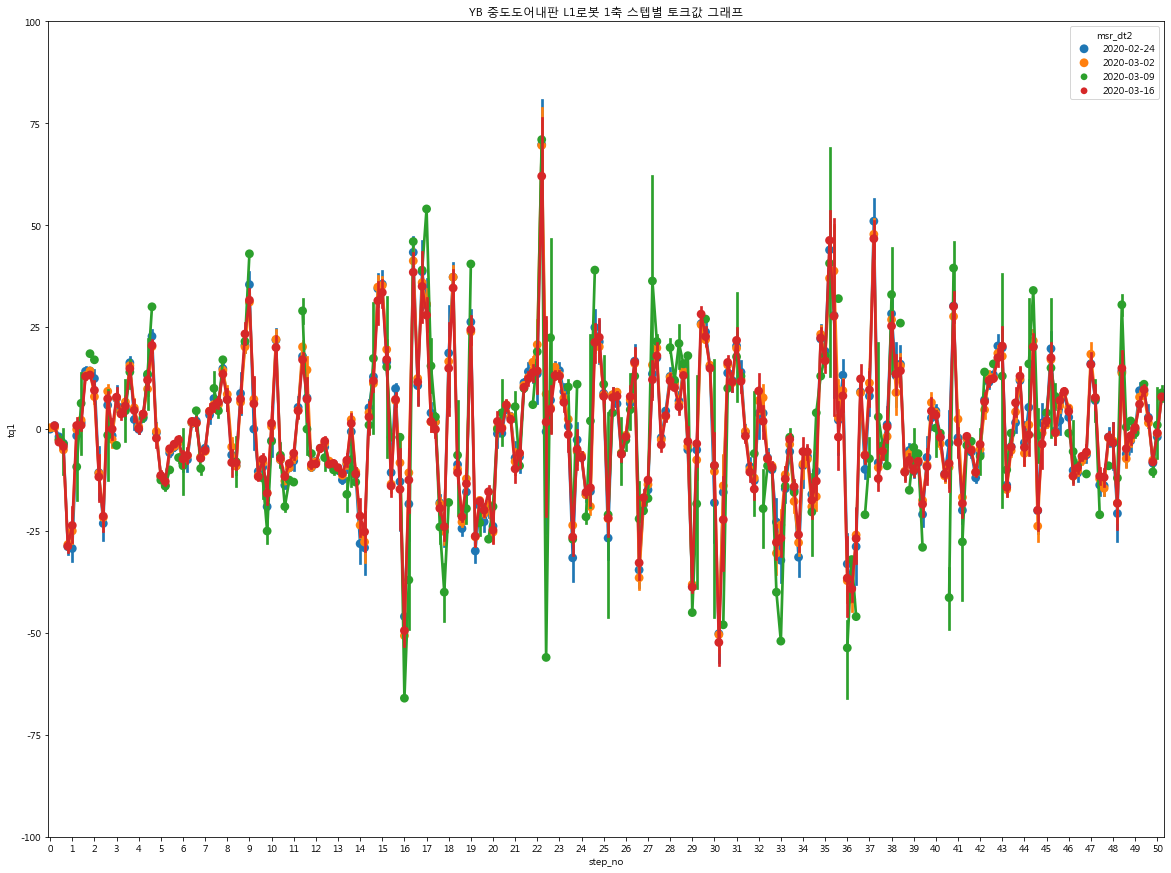

In [137]:
fig,ax = plt.subplots(1,1,figsize=(20,15))

d_list = ['2020-02-24','2020-03-02','2020-03-05','2020-03-09','2020-03-16']

df_ind = pd.DataFrame()
for date in d_list:
    df_ind = pd.concat([df_ind,df_yb[df_yb['msr_dt2'] == date]])
    
sns.pointplot(data = df_ind,x = df_ind['step_no'],y = df_ind['tq1'],hue = df_ind['msr_dt2'])
ax.xaxis.set_ticks(np.arange(0,252,5))
ax.set_ylim(-100,100)
ax.set(title = 'YB 중도도어내판 L1로봇 1축 스텝별 토크값 그래프')

[Text(0.5, 1.0, 'YB 중도도어내판 L1로봇 2축 스텝별 토크값 그래프')]

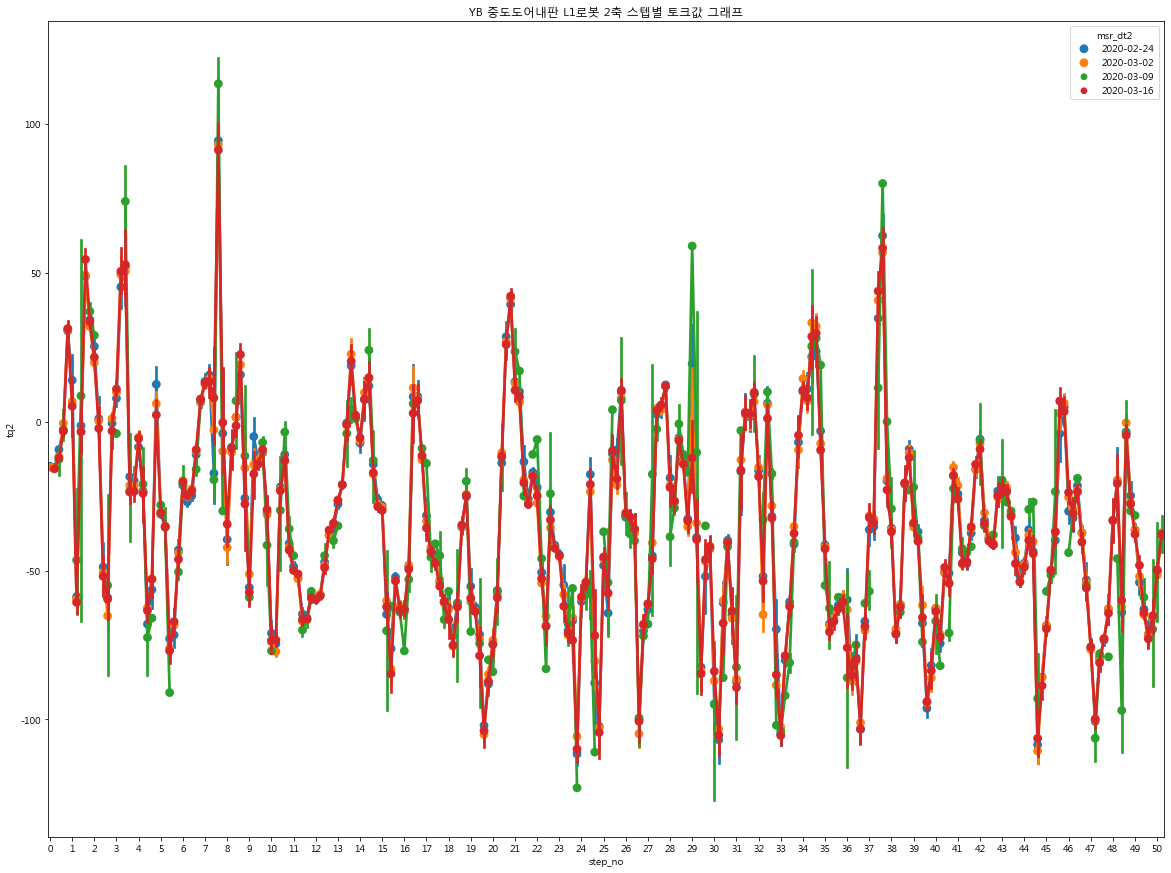

In [139]:
fig,ax = plt.subplots(1,1,figsize=(20,15))

d_list = ['2020-02-24','2020-03-02','2020-03-05','2020-03-09','2020-03-16']

df_ind = pd.DataFrame()
for date in d_list:
    df_ind = pd.concat([df_ind,df_yb[df_yb['msr_dt2'] == date]])
    
sns.pointplot(data = df_ind,x = df_ind['step_no'],y = df_ind['tq2'],hue = df_ind['msr_dt2'])
ax.xaxis.set_ticks(np.arange(0,252,5))
ax.set_ylim(None,None)
ax.set(title = 'YB 중도도어내판 L1로봇 2축 스텝별 토크값 그래프')

[Text(0.5, 1.0, 'YB 중도도어내판 L1로봇 3축 스텝별 토크값 그래프')]

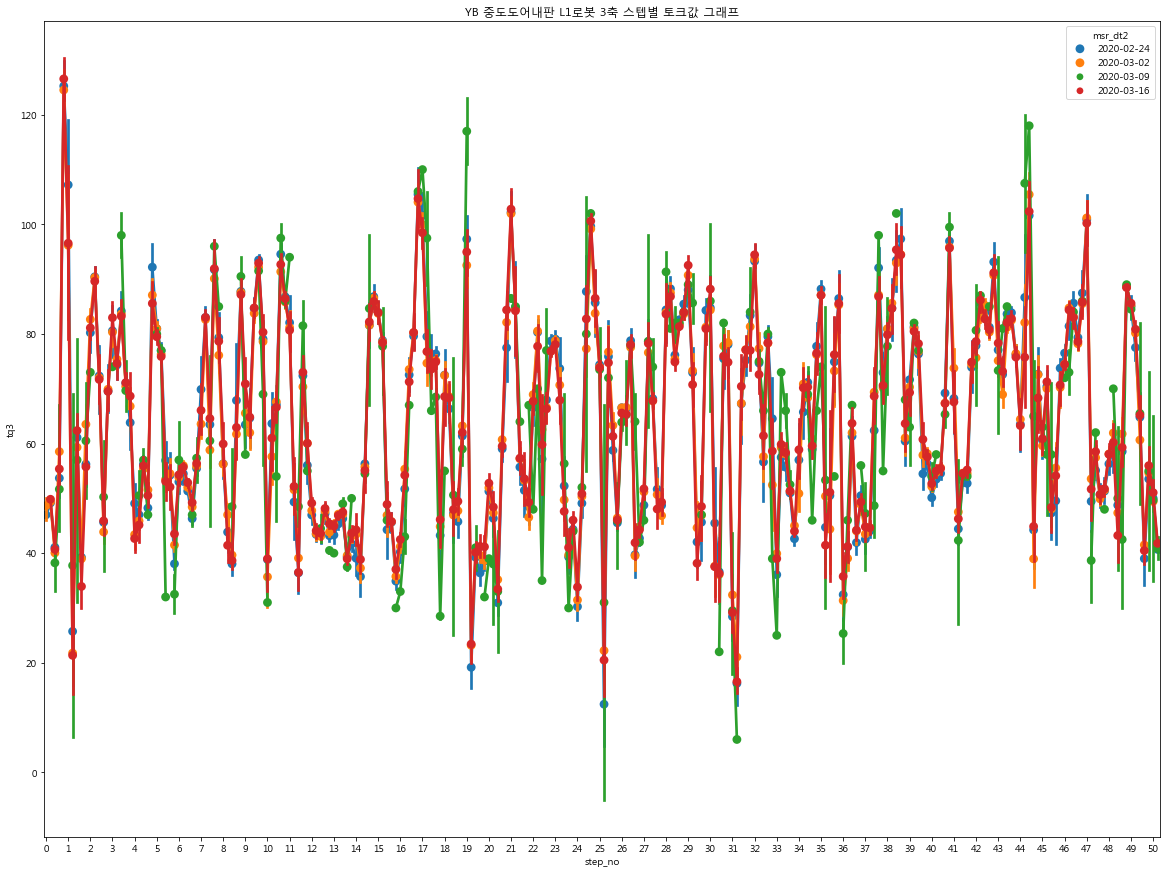

In [140]:
fig,ax = plt.subplots(1,1,figsize=(20,15))

d_list = ['2020-02-24','2020-03-02','2020-03-05','2020-03-09','2020-03-16']

df_ind = pd.DataFrame()
for date in d_list:
    df_ind = pd.concat([df_ind,df_yb[df_yb['msr_dt2'] == date]])
    
sns.pointplot(data = df_ind,x = df_ind['step_no'],y = df_ind['tq3'],hue = df_ind['msr_dt2'])
ax.xaxis.set_ticks(np.arange(0,252,5))
ax.set_ylim(None,None)
ax.set(title = 'YB 중도도어내판 L1로봇 3축 스텝별 토크값 그래프')

[Text(0.5, 1.0, 'YB 중도도어내판 L1로봇 4축 스텝별 토크값 그래프')]

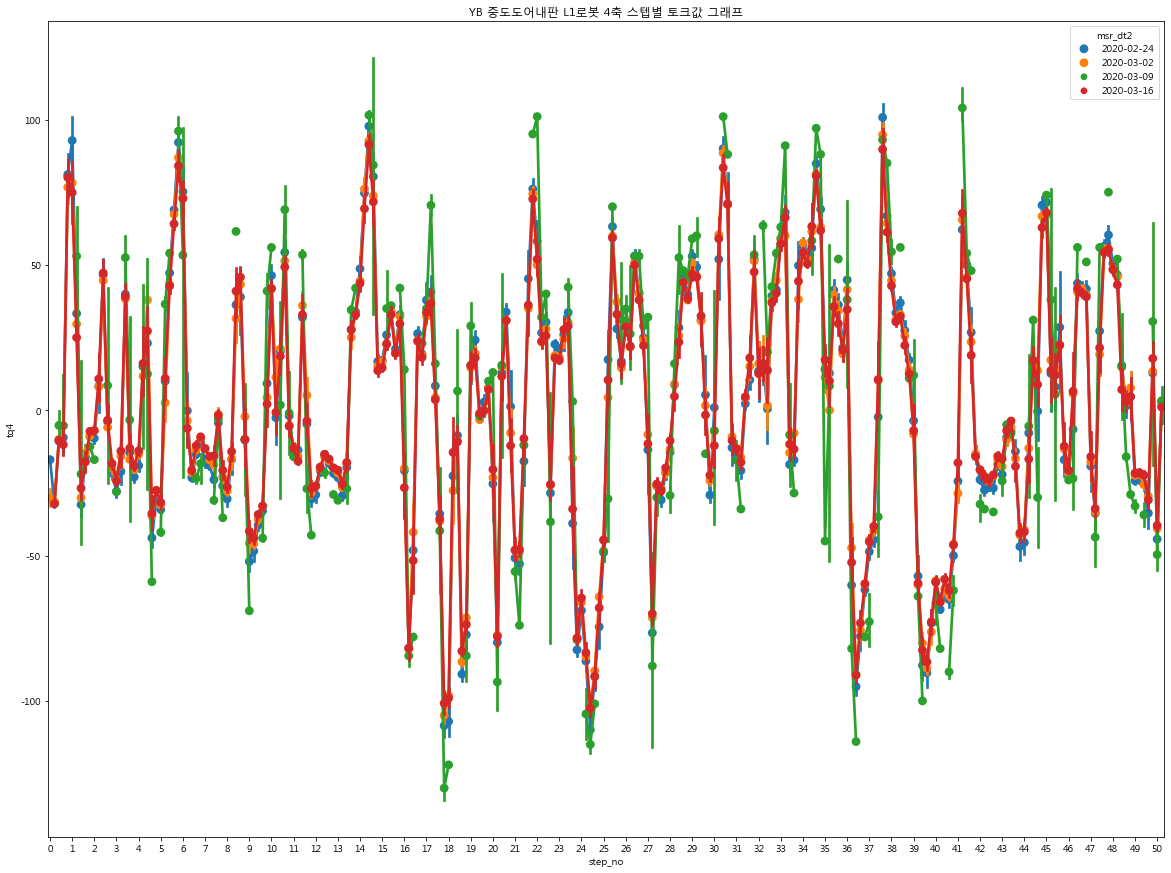

In [141]:
fig,ax = plt.subplots(1,1,figsize=(20,15))

d_list = ['2020-02-24','2020-03-02','2020-03-05','2020-03-09','2020-03-16']

df_ind = pd.DataFrame()
for date in d_list:
    df_ind = pd.concat([df_ind,df_yb[df_yb['msr_dt2'] == date]])
    
sns.pointplot(data = df_ind,x = df_ind['step_no'],y = df_ind['tq4'],hue = df_ind['msr_dt2'])
ax.xaxis.set_ticks(np.arange(0,252,5))
ax.set_ylim(None,None)
ax.set(title = 'YB 중도도어내판 L1로봇 4축 스텝별 토크값 그래프')

[Text(0.5, 1.0, 'YB 중도도어내판 L1로봇 5축 스텝별 토크값 그래프')]

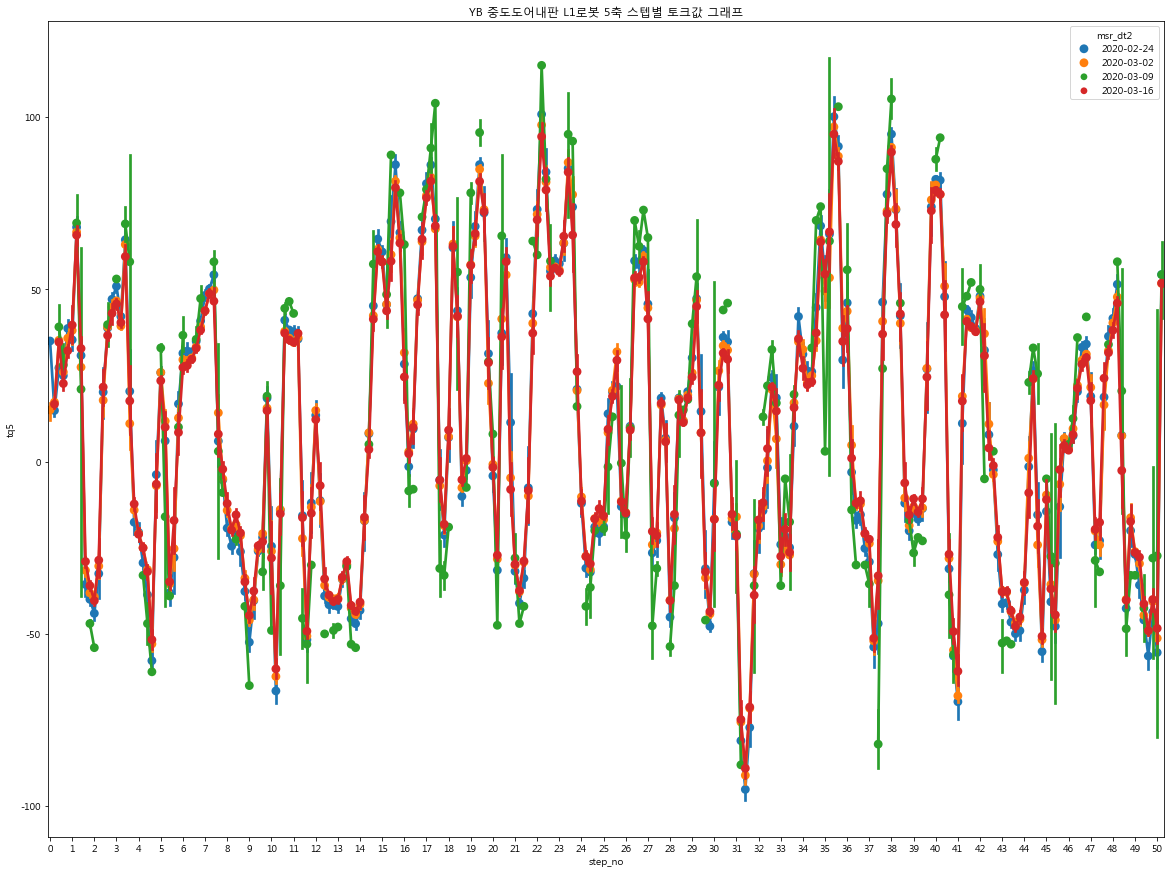

In [142]:
fig,ax = plt.subplots(1,1,figsize=(20,15))

d_list = ['2020-02-24','2020-03-02','2020-03-05','2020-03-09','2020-03-16']

df_ind = pd.DataFrame()
for date in d_list:
    df_ind = pd.concat([df_ind,df_yb[df_yb['msr_dt2'] == date]])
    
sns.pointplot(data = df_ind,x = df_ind['step_no'],y = df_ind['tq5'],hue = df_ind['msr_dt2'])
ax.xaxis.set_ticks(np.arange(0,252,5))
ax.set_ylim(None,None)
ax.set(title = 'YB 중도도어내판 L1로봇 5축 스텝별 토크값 그래프')

[Text(0.5, 1.0, 'YB 중도도어내판 L1로봇 6축 스텝별 토크값 그래프')]

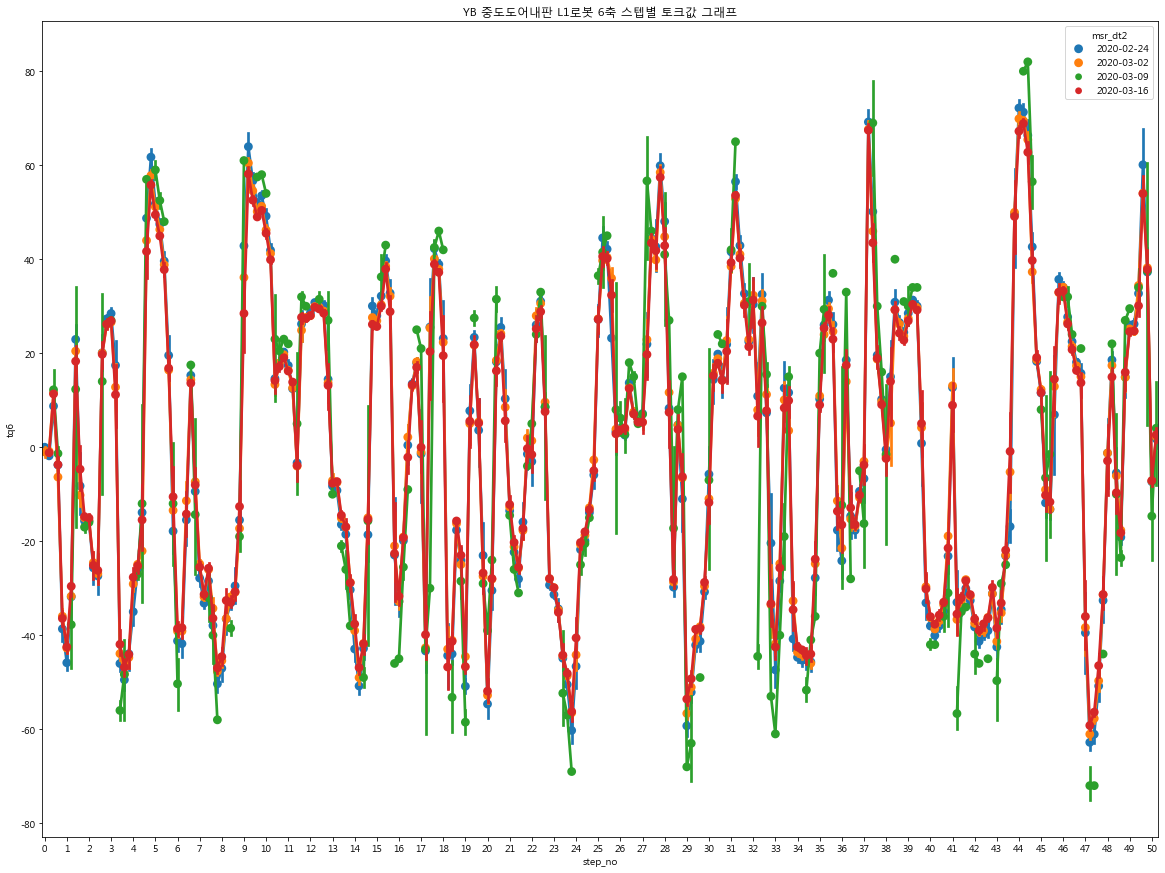

In [143]:
fig,ax = plt.subplots(1,1,figsize=(20,15))

d_list = ['2020-02-24','2020-03-02','2020-03-05','2020-03-09','2020-03-16']

df_ind = pd.DataFrame()
for date in d_list:
    df_ind = pd.concat([df_ind,df_yb[df_yb['msr_dt2'] == date]])
    
sns.pointplot(data = df_ind,x = df_ind['step_no'],y = df_ind['tq6'],hue = df_ind['msr_dt2'])
ax.xaxis.set_ticks(np.arange(0,252,5))
ax.set_ylim(None,None)
ax.set(title = 'YB 중도도어내판 L1로봇 6축 스텝별 토크값 그래프')

[Text(0.5, 1.0, 'YB 중도도어내판 L1로봇 7축 스텝별 토크값 그래프')]

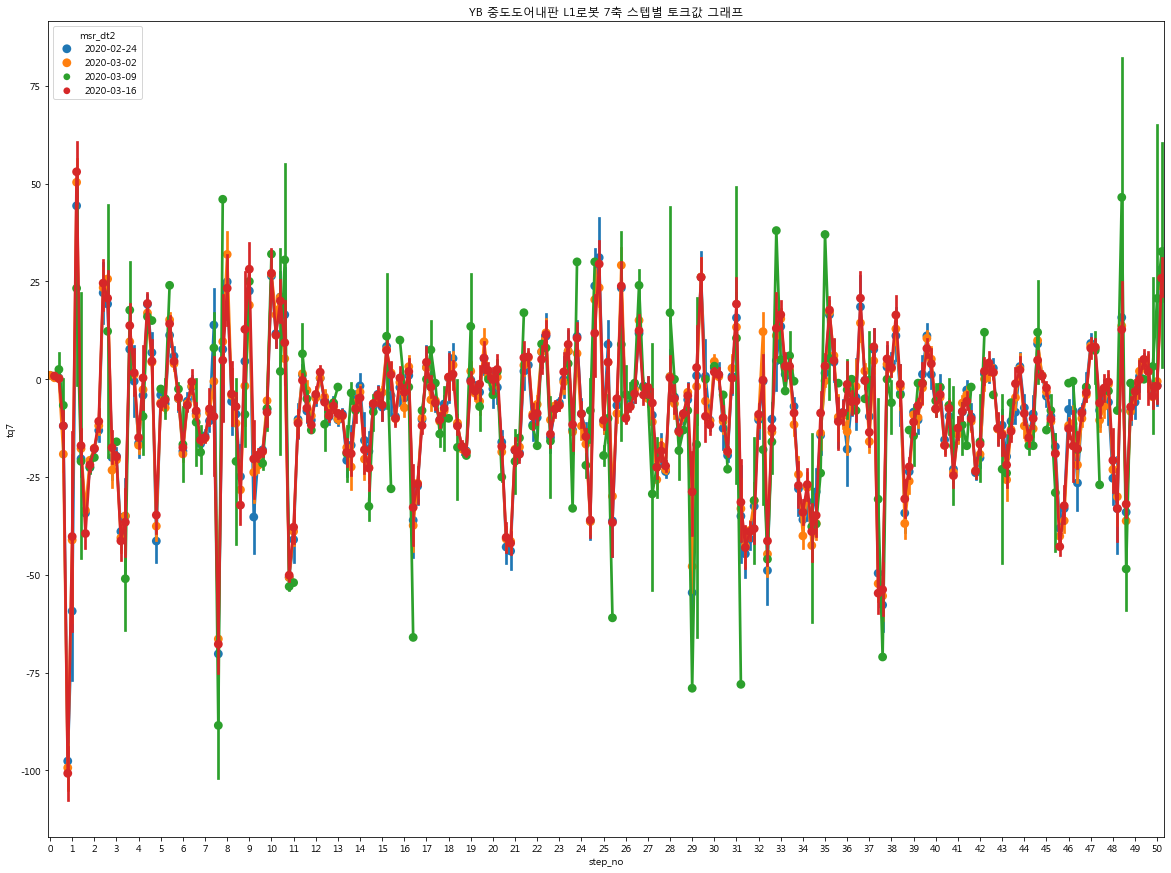

In [154]:
fig,ax = plt.subplots(1,1,figsize=(20,15))

d_list = ['2020-02-24','2020-03-02','2020-03-05','2020-03-09','2020-03-16']

df_ind = pd.DataFrame()
for date in d_list:
    df_ind = pd.concat([df_ind,df_yb[df_yb['msr_dt2'] == date]])
    
sns.pointplot(data = df_ind,x = df_ind['step_no'],y = df_ind['tq7'],hue = df_ind['msr_dt2'])
ax.xaxis.set_ticks(np.arange(0,252,5))
ax.set_ylim(None,None)
ax.set(title = 'YB 중도도어내판 L1로봇 7축 스텝별 토크값 그래프')